I'm curious how spectral indices change throughout the CIV space.  Namely because, since we suggest that the CIV space (at least roughly) tracks changing radio origins, there should be corresponding a spectral index gradient throughout CIV.

For now, all I care about are detections.

To start, I'll just trace spectral indices from 1.4-3 GHz.
1) Match Amy Rankine's CIV catalog to FIRST

2) Match (1) to the new preliminary VLASS source catalog.

Include (replace with?) LOFAR after.

1/20/2022: Now I'm adding nondetections

In [1]:
import numpy as np
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt

A spectral index is defined as:

$$ \alpha_\nu = \frac{\log{S_2/S_1}}{\log{\nu_2/\nu_1}} $$

In [2]:
def spec_index(nu1, flux1, nu2, flux2):
    return np.log10(flux2/flux1) / np.log10(nu2/nu1)

In [3]:
dat = Table.read("/Users/Trevor1/Desktop/data/files/catalogs/rankine_first_vlass1.fits").to_pandas()
S14 = dat["FIRST_FLUX"].values ; good = dat["good"].values ; p = dat["P_sidelobe"].values
dat = dat[((S14>0)&(good)&(p<=0.03))]

(array([212.,   0.,   0.,  28.,   0.,   0.,  17.,   0.,   0.,   8.]),
 array([0.   , 0.003, 0.006, 0.009, 0.012, 0.015, 0.018, 0.021, 0.024,
        0.027, 0.03 ]),
 <BarContainer object of 10 artists>)

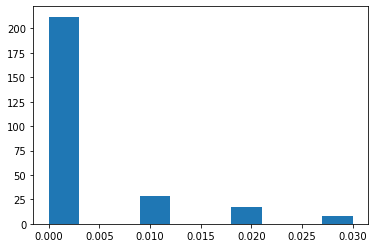

In [4]:
plt.hist(dat["P_sidelobe"].values[dat["P_sidelobe"].values>=0])

In [5]:
#CIV props
ew   = dat["CIV_EW"].values
blue = dat["CIV_blue"].values
dist = dat["CIV_Distance"].values

#load in all fluxes we're going to use
S14 = dat["FIRST_FLUX"].values
S3  = dat["Peak_flux"].values #vlass QL fluxes unreliable (https://library.nrao.edu/public/memos/vla/vlass/VLASS_013.pdf); will need to change if worthwhile

In [6]:
specs = spec_index(1.4, S14, 3., S3)

(array([   9.,   68.,  578., 1443., 1122.,  448.,  150.,   59.,   16.,
           2.]),
 array([-2.57974014, -2.02041137, -1.46108259, -0.90175382, -0.34242505,
         0.21690372,  0.77623249,  1.33556126,  1.89489004,  2.45421881,
         3.01354758]),
 <BarContainer object of 10 artists>)

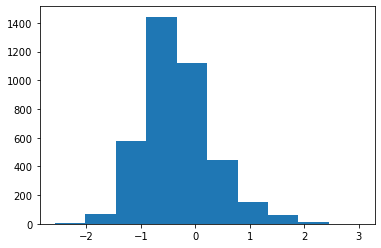

In [7]:
plt.hist(specs)

In [8]:
vsteep = specs<-1
steep  = (specs>=-1.)&(specs<-.5)
flat   = (specs>=-.5)&(specs<0)
inv    = (specs>0)

(-13.317101666694004, 250.0)

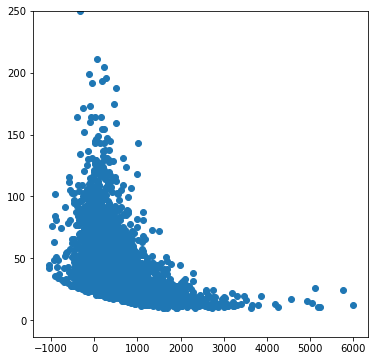

In [9]:
fig = plt.figure(figsize=(6,6))
plt.scatter(blue, ew)
plt.ylim(None,250)

Text(0.5, 1.0, 'FIRST-VLASS spectral indices for Rankine20 sources')

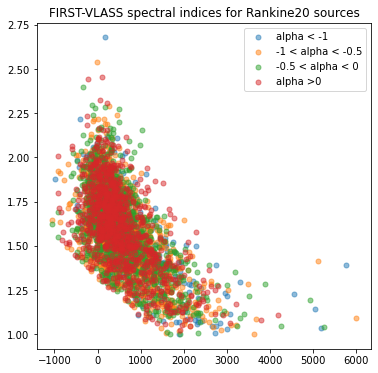

In [10]:
fig = plt.figure(figsize=(6,6))
plt.scatter(blue[vsteep], np.log10(ew[vsteep]), s=25, alpha=0.5, label="alpha < -1")
plt.scatter(blue[steep], np.log10(ew[steep]), s=25, alpha=0.5, label="-1 < alpha < -0.5")
plt.scatter(blue[flat], np.log10(ew[flat]), s=25, alpha=0.5, label="-0.5 < alpha < 0")
plt.scatter(blue[inv], np.log10(ew[inv]), s=25, alpha=0.5, label="alpha >0")
plt.legend(loc="best")
#plt.ylim(None,250)
#plt.yscale("log")
plt.title("FIRST-VLASS spectral indices for Rankine20 sources")

Text(0.5, 0.98, 'FIRST-VLASS spectral indices for Rankine20 sources')

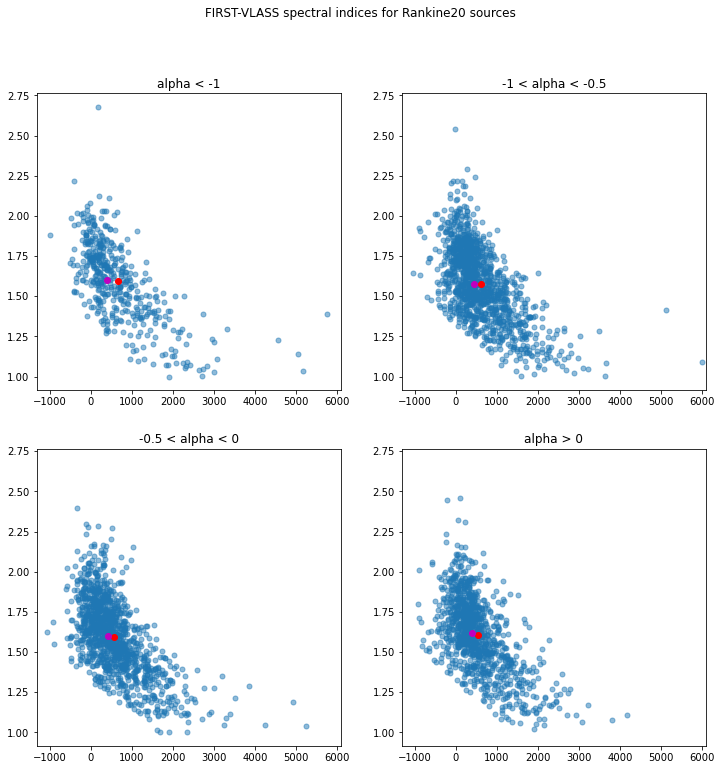

In [11]:
xlims = (-1322.0638186710635, 6099.617344838371)
ylims = (0.9170542716803618, 2.7621967876023605)

fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0,0].scatter(blue[vsteep], np.log10(ew[vsteep]), s=25, alpha=0.5)
axs[0,0].scatter(np.mean(blue[vsteep]), np.mean(np.log10(ew[vsteep])), color="r")
axs[0,0].scatter(np.median(blue[vsteep]), np.median(np.log10(ew[vsteep])), color="m")
axs[0,0].set_title("alpha < -1")

axs[0,1].scatter(blue[steep], np.log10(ew[steep]), s=25, alpha=0.5)
axs[0,1].scatter(np.mean(blue[steep]), np.mean(np.log10(ew[steep])), color="r")
axs[0,1].scatter(np.median(blue[steep]), np.median(np.log10(ew[steep])), color="m")
axs[0,1].set_xlim(xlims)
axs[0,1].set_ylim(ylims)
axs[0,1].set_title("-1 < alpha < -0.5")

axs[1,0].scatter(blue[flat], np.log10(ew[flat]), s=25, alpha=0.5)
axs[1,0].scatter(np.mean(blue[flat]), np.mean(np.log10(ew[flat])), color="r")
axs[1,0].scatter(np.median(blue[flat]), np.median(np.log10(ew[flat])), color="m")
axs[1,0].set_xlim(xlims)
axs[1,0].set_ylim(ylims)
axs[1,0].set_title("-0.5 < alpha < 0")

axs[1,1].scatter(blue[inv], np.log10(ew[inv]), s=25, alpha=0.5)
axs[1,1].scatter(np.mean(blue[inv]), np.mean(np.log10(ew[inv])), color="r")
axs[1,1].scatter(np.median(blue[inv]), np.median(np.log10(ew[inv])), color="m")
axs[1,1].set_xlim(xlims)
axs[1,1].set_ylim(ylims)
axs[1,1].set_title("alpha > 0")

plt.suptitle("FIRST-VLASS spectral indices for Rankine20 sources")

In [12]:
from scipy.stats import gaussian_kde

def plot_contour(xdata, ydata, c="k", nlevels=3, ax=None, scat=True):
    if ax is None:
        ax = plt.gca()
    xmin, xmax = xdata.min(), xdata.max()
    ymin, ymax = ydata.min(), ydata.max()
    X, Y = np.mgrid[xmin:xmax:1000j, ymin:ymax:1000j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([xdata, ydata])
    kernel = gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    
    #ax.contour(X, Y, Z, levels=nlevels, linewidths=1.5, colors=c)
    levels = ax.contour(X, Y, Z, levels=nlevels, linewidths=1.5, colors=c).levels
    if scat:
        for i in range(len(xdata)):
            #These are the indices of the ith's point location in Z (the density estimation) - probably the only tricky part about this
            xind = abs(X[:,0] - positions[0, abs(positions[0] - xdata[i]).argmin()]).argmin()
            yind = abs(Y[0,:] - positions[1, abs(positions[1] - ydata[i]).argmin()]).argmin()

            if Z[xind,yind] < levels[1]: #Plot the scatter point if it's below outermost contour level
                ax.scatter(xdata[i], ydata[i], color=c, s=10)#, label="VLA Detections")


(10.021307443331917, 250.0)

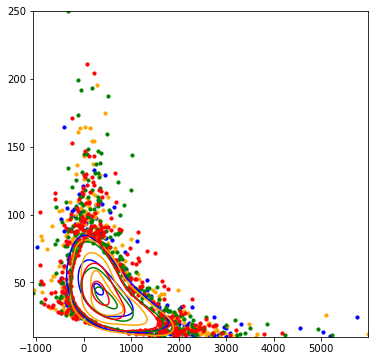

In [13]:
fig = plt.figure(figsize=(6,6))
plot_contour(blue[vsteep], ew[vsteep], c="b")
plot_contour(blue[steep], ew[steep], c="orange")
plot_contour(blue[flat], ew[flat], c="g")
plot_contour(blue[inv], ew[inv], c="r")
plt.ylim(None,250)

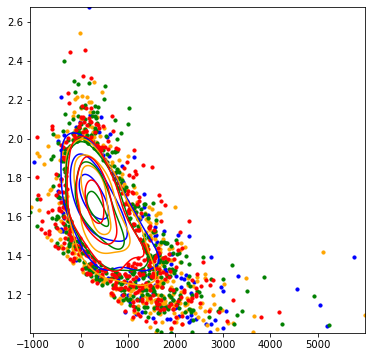

In [14]:
fig = plt.figure(figsize=(6,6))
plot_contour(blue[vsteep], np.log10(ew[vsteep]), c="b")
plot_contour(blue[steep], np.log10(ew[steep]), c="orange")
plot_contour(blue[flat], np.log10(ew[flat]), c="g")
plot_contour(blue[inv], np.log10(ew[inv]), c="r")
#plt.ylim(None,250)

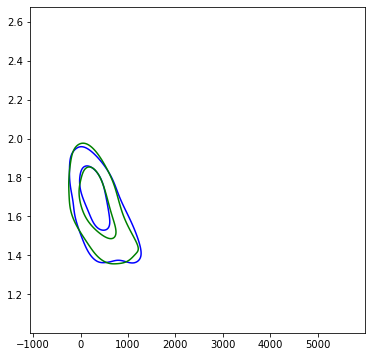

In [15]:
fig = plt.figure(figsize=(6,6))
plot_contour(blue[vsteep|steep], np.log10(ew[vsteep|steep]), c="b", nlevels=2, scat=False)
plot_contour(blue[flat|inv], np.log10(ew[flat|inv]), c="g", nlevels=2, scat=False)
#plt.ylim(None,250)

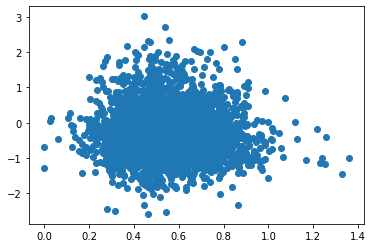

In [16]:
plt.scatter(dist, specs)

---

Not as clear as I expected - try with DR7 quasars only.

In [17]:
dat = Table.read("/Users/Trevor1/Desktop/data/files/catalogs/rankine_first_vlass1_dr7.fits").to_pandas()
S14 = dat["FIRST_FLUX"].values ; good = dat["good"].values ; p = dat["P_sidelobe"].values
dat = dat[((S14>0)&(good)&(p<=0.03))]

In [18]:
#CIV props
ew   = dat["CIV_EW"].values
blue = dat["CIV_blue"].values
dist = dat["CIV_Distance"].values

#load in all fluxes we're going to use
S14 = dat["FIRST_FLUX"].values
S3  = dat["Peak_flux"].values #vlass QL fluxes unreliable (https://library.nrao.edu/public/memos/vla/vlass/VLASS_013.pdf); will need to change if worthwhile

In [19]:
specs = spec_index(1.4, S14, 3., S3)

In [20]:
vsteep = specs<-1
steep  = (specs>=-1.)&(specs<-.5)
flat   = (specs>=-.5)&(specs<0)
inv    = (specs>0)

Text(0.5, 1.0, 'SDSS-DR7 - steep and flat spectral indices')

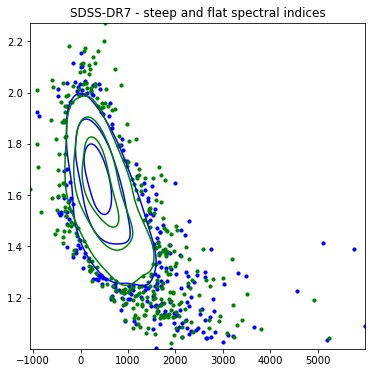

In [21]:
fig = plt.figure(figsize=(6,6))
plot_contour(blue[vsteep|steep], np.log10(ew[vsteep|steep]), c="b")
plot_contour(blue[flat|inv], np.log10(ew[flat|inv]), c="g")
plt.title("SDSS-DR7 - steep and flat spectral indices")
#plt.ylim(None,250)

Definitely not the expected result.  Try looking at RQ only, roughly $R<10$

In [22]:
R = dat["R_6CM_2500A"]

In [23]:
(R<10).sum()

140

Text(0.5, 1.0, 'SDSS-DR7 - FIRST-VLASS specs, R<10')

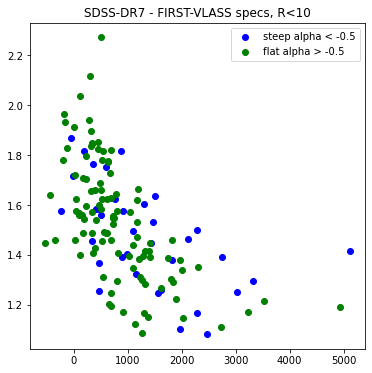

In [24]:
fig = plt.figure(figsize=(6,6))
plt.scatter(blue[(vsteep|steep)&(R<10)], np.log10(ew[(vsteep|steep)&(R<10)]), c="b", label="steep alpha < -0.5")
plt.scatter(blue[(flat|inv)&(R<10)], np.log10(ew[(flat|inv)&(R<10)]), c="g", label="flat alpha > -0.5")
plt.legend(loc="best")
plt.title("SDSS-DR7 - FIRST-VLASS specs, R<10")
#plt.ylim(None,250)

More suggestive than before at least.  But it'd be nicer to have more RQ.  See what contours look like.

Text(0.5, 1.0, 'SDSS-DR7 - FIRST-VLASS specs, R<10')

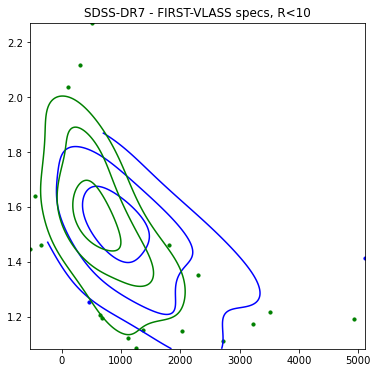

In [25]:
fig = plt.figure(figsize=(6,6))
plot_contour(blue[(vsteep|steep)&(R<10)], np.log10(ew[(vsteep|steep)&(R<10)]), c="b")
plot_contour(blue[(flat|inv)&(R<10)], np.log10(ew[(flat|inv)&(R<10)]), c="g")
#plt.legend(["alpha < -0.5", "alpha > -0.5"], loc="upper right")
plt.title("SDSS-DR7 - FIRST-VLASS specs, R<10")
#plt.ylim(None,250)

Contours show what we want -- steeper spectral indices tending towards high CIV distance/blueshift.

Now look at *all* sources with steep spectral indices and check if there's a difference between RQ/RL.

Total RQ = 35
Total RL = 754


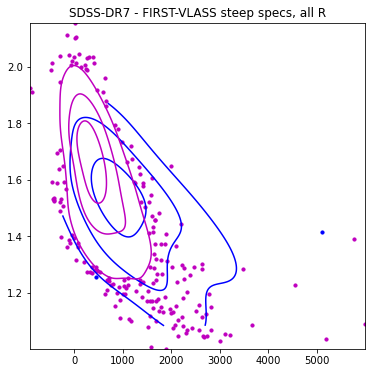

In [26]:
fig = plt.figure(figsize=(6,6))
plot_contour(blue[(vsteep|steep)&(R<10)], np.log10(ew[(vsteep|steep)&(R<10)]), c="b")
plot_contour(blue[(vsteep|steep)&(R>10)], np.log10(ew[(vsteep|steep)&(R>10)]), c="m")
#plot_contour(blue[(flat|inv)&(R>10)], np.log10(ew[(flat|inv)&(R>10)]), c="orange")
#plot_contour(blue[(flat|inv)&(R<10)], np.log10(ew[(flat|inv)&(R<10)]), c="g")
#plt.legend(["alpha < -0.5", "alpha < -0.5"], loc="upper right")
plt.title("SDSS-DR7 - FIRST-VLASS steep specs, all R")
#plt.ylim(None,250)

print("Total RQ = %d" % ((vsteep|steep)&(R<10)).sum())
print("Total RL = %d" % ((vsteep|steep)&(R>10)).sum())

OK, this one looks promising.  It'd be more convincing with a larger sample size, but still is consistent with our findings: steep spectral indices arise as a result of synchrtron from SF or winds, and for the radio-loud sources we expect an added jet component which would flatten their spectral index.

See if there's a similar offset for the flat-spectrum sources. 

Total RQ = 105
Total RL = 1056


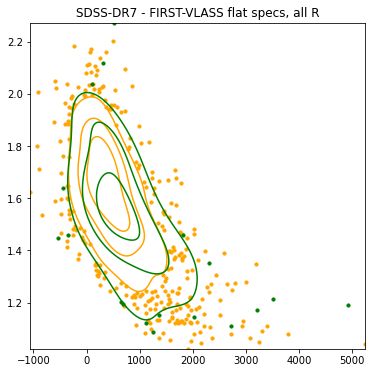

In [27]:
fig = plt.figure(figsize=(6,6))
#plot_contour(blue[(vsteep|steep)&(R<10)], np.log10(ew[(vsteep|steep)&(R<10)]), c="b")
#plot_contour(blue[(vsteep|steep)&(R>10)], np.log10(ew[(vsteep|steep)&(R>10)]), c="m")
plot_contour(blue[(flat|inv)&(R>10)], np.log10(ew[(flat|inv)&(R>10)]), c="orange")
plot_contour(blue[(flat|inv)&(R<10)], np.log10(ew[(flat|inv)&(R<10)]), c="g")
#plt.legend(["alpha > -0.5", "alpha > -0.5"], loc="upper right")
plt.title("SDSS-DR7 - FIRST-VLASS flat specs, all R")
#plt.ylim(None,250)

print("Total RQ = %d" % ((flat|inv)&(R<10)).sum())
print("Total RL = %d" % ((flat|inv)&(R>10)).sum())

---

All of the above was using the preliminary release of VLASS1.  So we might expect some scatter both from 1.4-3GHz not covering a wide enough frequency range, and the fact that these flux densities are expected to be underestimated and have some scatter.

Now use LOFAR in attempt to address those shortcomings.  Of course, now the problem will be that we don't have enough quasars.  Should think about including nondetections.

In [27]:
lof = Table.read("/Users/Trevor1/Desktop/data/files/catalogs/rankine_lotssfootprint_lotssmatch.fits").to_pandas()
S14 = lof["FIRST_FLUX"].values ; S144 = lof["Speak"].values ; good = lof["good"].values 
lof = lof[(((S14>0)|(~np.isnan(S144)))&(good))] #need a detection in one of FIRST/LOFAR

In [28]:
lof.shape

(1414, 105)

In [29]:
#CIV props
ew   = lof["CIV_EW"].values
blue = lof["CIV_blue"].values
dist = lof["CIV_Distance"].values

#load in all fluxes we're going to use
S14 = lof["FIRST_FLUX"].values
S144= lof["Speak"].values 

In [32]:
print("FIRST detections: %d" % (S14>0).sum())
print("LoTSS detections: %d" % (~np.isnan(S144)).sum())

FIRST detections: 329
LoTSS detections: 1307


In [33]:
#Set upper limits for non detections
S14[S14<0] = 0.45
S144[np.isnan(S144)] = .21

In [36]:
specs_lof = spec_index(.144, S144, 1.4, S14)

In [37]:
vsteep = specs_lof<-1
steep  = (specs_lof>=-1.)&(specs_lof<-.5)
flat   = (specs_lof>=-.5)&(specs_lof<0)
inv    = (specs_lof>0)

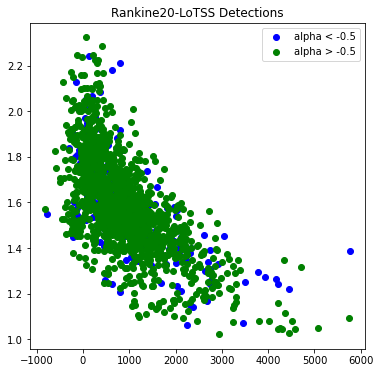

In [38]:
fig = plt.figure(figsize=(6,6))
plt.scatter(blue[(vsteep|steep)], np.log10(ew[(vsteep|steep)]), c="b", label="alpha < -0.5")
plt.scatter(blue[(flat|inv)], np.log10(ew[(flat|inv)]), c="g", label="alpha > -0.5")
plt.title("Rankine20-LoTSS Detections")
plt.legend(loc="best")
#plt.ylim(None,250)

Need more radio-quiet quasars!

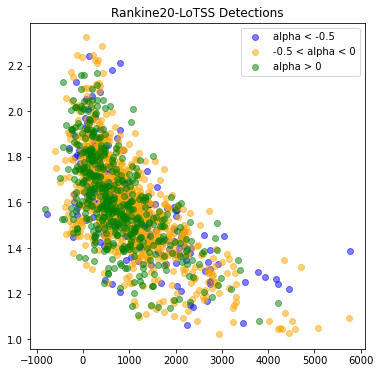

In [45]:
fig = plt.figure(figsize=(6,6))
plt.scatter(blue[(vsteep|steep)], np.log10(ew[(vsteep|steep)]), c="b", label="alpha < -0.5", alpha=0.5)
plt.scatter(blue[(flat)], np.log10(ew[(flat)]), c="orange", label="-0.5 < alpha < 0", alpha=0.5)
plt.scatter(blue[(inv)], np.log10(ew[(inv)]), c="g", label="alpha > 0", alpha=0.5)
plt.title("Rankine20-LoTSS Detections")
plt.legend(loc="best")
#plt.ylim(None,250)

No handles with labels found to put in legend.


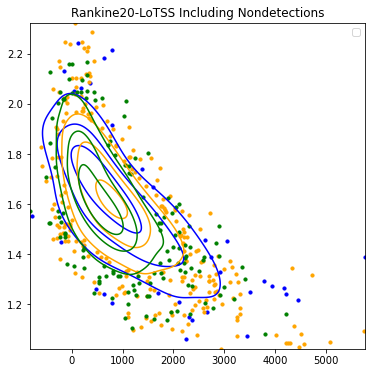

In [48]:
fig = plt.figure(figsize=(6,6))
plot_contour(blue[(vsteep|steep)], np.log10(ew[(vsteep|steep)]), c="b")
plot_contour(blue[(flat)], np.log10(ew[(flat)]), c="orange")
plot_contour(blue[(inv)], np.log10(ew[(inv)]), c="g")
plt.title("Rankine20-LoTSS Including Nondetections")
plt.legend(loc="best")
plt.savefig("figures/CIV_LoTSS-FIRSTspectralindex_wnondetections.png")
#plt.ylim(None,250)

In [47]:
spec_index(.144, np.median(S144), 1.4, .45)

-0.19426221140178965

Median FIRST nondetection has $\alpha=-0.2$, so separation above is physical - don't have a biased amount of inverted or steep spectra 

No handles with labels found to put in legend.


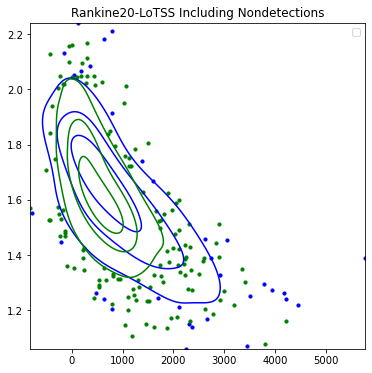

In [51]:
fig = plt.figure(figsize=(6,6))
plot_contour(blue[(vsteep|steep)], np.log10(ew[(vsteep|steep)]), c="b")
#plt.scatter(blue[(flat)], np.log10(ew[(flat)]), c="orange", label="-0.5 < alpha < 0", alpha=0.5)
plot_contour(blue[(inv)], np.log10(ew[(inv)]), c="g")
plt.title("Rankine20-LoTSS Including Nondetections")
plt.legend(loc="best")
plt.savefig("figures/CIV_LoTSS-FIRSTspectralindex_invvssteep_wnondetections.png")
#plt.ylim(None,250)

Distribution could be shifting to higher CIV distance?

Text(0.5, 1.0, 'Rankine20-LoTSS Detections')

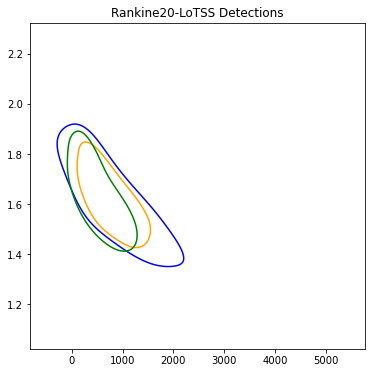

In [40]:
fig = plt.figure(figsize=(6,6))
plot_contour(blue[(vsteep|steep)], np.log10(ew[(vsteep|steep)]), c="b", nlevels=1, scat=False)
plot_contour(blue[(flat)], np.log10(ew[(flat)]), c="orange", nlevels=1, scat=False)
plot_contour(blue[(inv)], np.log10(ew[(inv)]), c="g", nlevels=1, scat=False)
plt.title("Rankine20-LoTSS Detections")
#plt.legend(loc="best")
#plt.ylim(None,250)

(array([0.50287313, 0.80002544, 1.8057717 , 2.62865501, 2.53722353,
        1.46290366, 0.64002035, 0.36572591, 0.04571574, 0.04571574]),
 array([0.19895082, 0.29124746, 0.3835441 , 0.47584075, 0.56813739,
        0.66043403, 0.75273067, 0.84502732, 0.93732396, 1.0296206 ,
        1.12191725]),
 [<matplotlib.patches.Polygon at 0x7f89ea309760>])

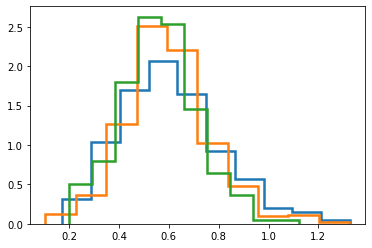

In [41]:
plt.hist(dist[steep], histtype="step", linewidth=2.5, density=True)
plt.hist(dist[flat], histtype="step", linewidth=2.5, density=True)
plt.hist(dist[inv], histtype="step", linewidth=2.5, density=True)